# POLYNOMIAL FITTING ON WEB TRAFFIC DATASET

Given a Web traffic dataset with x and y as months in numbers and the web traffic count, we tried to use linear regression to create a model for prediction. but the accuracy we obtained was too low to be considered a good model. 
So we move on to use polynomial fitting.

Importing necessary python packages

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

Reading in the training data

In [2]:
data = pd.read_csv('dataset/web_traffic.tsv',sep='\t')
print(data.head())

   x       y
0  1  2272.0
1  2     NaN
2  3  1386.0
3  4  1365.0
4  5  1488.0


Dropping out the rows with nan column values

In [3]:
data.dropna(inplace=True)
print(data.head())

   x       y
0  1  2272.0
2  3  1386.0
3  4  1365.0
4  5  1488.0
5  6  1337.0


seperating the features and labels and visualizing the data

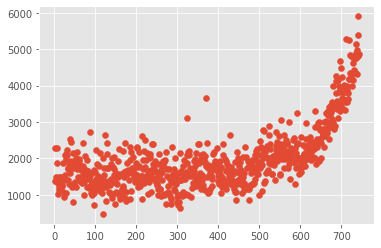

In [4]:
x_train = np.array(data['x'])
y_train = np.array(data['y'])
plt.scatter(x_train,y_train)
plt.show()

Two functions for finding the error values and accuracy or the coefficient of determination.
The error function used here is the r_squared method.

where the coefficient of determination r = (squared error of the curve/line)/(squared error of the mean of y)
i.e.,   r = ((SE y^) / SE (mean(y)))

In [5]:
def sq_err(ys,y_line):
    return sp.sum((ys - y_line)**2)

def coeff_of_determination(ys,y_line):
    y_mean_line = [sp.mean(ys) for y in ys]
    sq_err_regr = sq_err(ys,y_line)
    sq_err_y_mean = sq_err(ys,y_mean_line)
    
    return 1 - (sq_err_regr/sq_err_y_mean)

## A 1D polynomial - linear line

 
2.596 x + 989
Accuracy =  0.41632369094258925


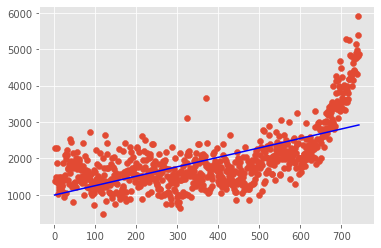

In [6]:
fp1 = sp.polyfit(x_train,y_train,1)
f1 = sp.poly1d(fp1)
print(f1)
print("Accuracy = ",coeff_of_determination(y_train,f1(x_train)))

plt.scatter(x_train,y_train)
plt.plot(x_train,f1(x_train),color='b')
plt.show()

## A 2D polynomial

         2
0.01053 x - 5.265 x + 1975
Accuracy =  0.6690122985058977


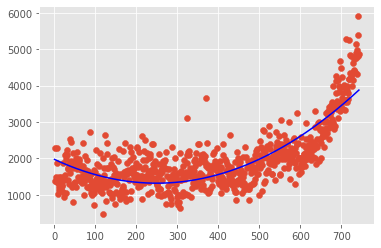

In [7]:
fp2 = sp.polyfit(x_train,y_train,2)
f2 = sp.poly1d(fp2)
print(f2)
print("Accuracy = ",coeff_of_determination(y_train,f2(x_train)))

plt.scatter(x_train,y_train)
plt.plot(x_train,f2(x_train),color='b')
plt.show()

## A 3D Polynomial

          3           2
3.05e-05 x - 0.02359 x + 4.942 x + 1333
Accuracy =  0.7437366099834488


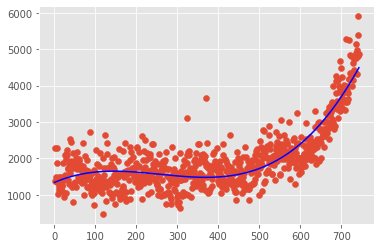

In [8]:
fp3 = sp.polyfit(x_train,y_train,3)
f3 = sp.poly1d(fp3)
print(f3)
print("Accuracy = ",coeff_of_determination(y_train,f3(x_train)))

plt.scatter(x_train,y_train)
plt.plot(x_train,f3(x_train),color='b')
plt.show()

## A 10D polynomial

0.775749396187765


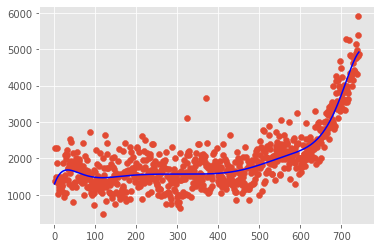

In [9]:
fp10 = sp.polyfit(x_train,y_train,10)
f10 = sp.poly1d(fp10)
print(coeff_of_determination(y_train,f10(x_train)))

plt.scatter(x_train,y_train)
plt.plot(x_train,f10(x_train),color='b')
plt.show()

## A 15D polynomial

Accuracy =  0.7931464035892709


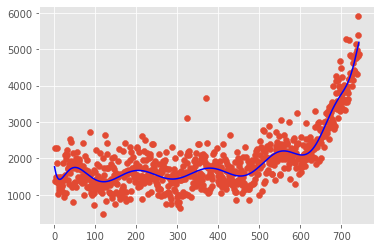

In [10]:
fp15 = sp.polyfit(x_train,y_train,15)
f15 = sp.poly1d(fp15)
print("Accuracy = ",coeff_of_determination(y_train,f15(x_train)))

plt.scatter(x_train,y_train)
plt.plot(x_train,f15(x_train),color='b')
plt.show()

As you can see the accuracy tends to increase while increasing the dimensions of the polynomial.

But the graphs with dimensions d10 and d15 is prone to over-fitting. i.e., it is not a best fit gor the data points.

The accuracy of this model is far better than the one which is trained in Linear Regression.